# Turkey Electricity demo

Start notebook with import initialization

In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4

## Load dataset

We will use Pandas to load our dataset

In [2]:
electricity = pd.read_csv('../../datasets/public/turkey_elec.csv', parse_dates=[0], names=['date', 'usage'])
print(electricity.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 2 columns):
date     3288 non-null datetime64[ns]
usage    3288 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 51.5 KB
None


In [3]:
electricity.head()

,date,usage
0,2000-01-01,12551.500000
1,2000-01-02,13377.041667
2,2000-01-03,15300.625000
3,2000-01-04,15582.750000
4,2000-01-05,15691.750000


In [4]:
electricity.tail()

,date,usage
3283,2008-12-27,22546.000000
3284,2008-12-28,20477.791667
3285,2008-12-29,23093.000000
3286,2008-12-30,23493.625000
3287,2008-12-31,22919.000000


### Lets visualize it

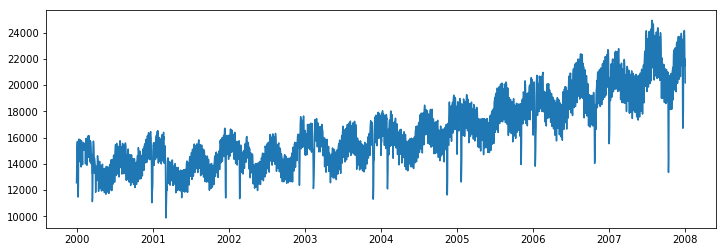

In [5]:
def plot_time_range(df, start_date='2000', end_date='2008'):
    df = df[(df.date >= start_date) & (df.date <= end_date)]
    plt.plot_date(df.date.astype(datetime), df.usage, fmt="-")
    plt.show()
    
plot_time_range(electricity)

### Usage in 2007

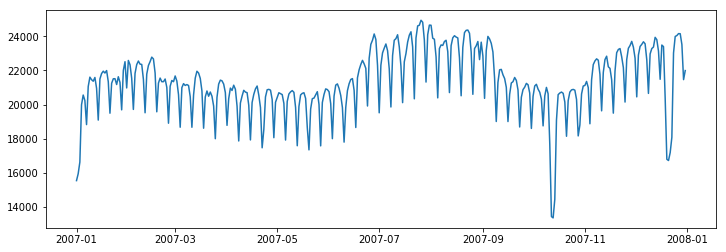

In [6]:
plot_time_range(electricity, '2007-01-01', '2007-12-31')

### Usage in 2008

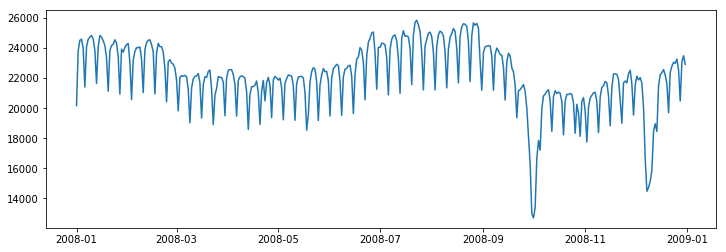

In [7]:
plot_time_range(electricity, '2008-01-01', '2008-12-31')

## Create training and test set

We will use years 2000-2007 as a training data. 

The January 2008 will be used as test data. The goal is to predict usage for all days in this month

In [8]:
df = electricity[electricity.date < '2008']
x_train = df.date
y_train = df.usage
df = electricity[(electricity.date >= '2008-01-01') & (electricity.date <= '2008-01-31')]
x_test = df.date
y_test = df.usage

## Define cost function

We use Root Mean Squared Error as a cost function:

$$ RMSE = \sqrt{\frac{1}{N} \sum_{i=1}^{N}(y-\hat{y})^2}$$

where:

  * $N$ - Number of samples
  * $y$ - Predicted value
  * $\hat{y}$ - True value

In [9]:
def cost(y, y_hat):    
    return np.sqrt(metrics.mean_squared_error(y_hat, y))

### Check same naive predictions

In [10]:
y_pred = y_test
print('Ideal prediction: %.2f' % cost(y_pred, y_test))
y_pred = [0]*len(y_test)
print('Zero prediction: %.2f' % cost(y_pred, y_test))
mu = np.mean(y_train)
y_pred = [mu]*len(y_test)
print('Mean value prediction: %.2f' % cost(y_pred, y_test))

Ideal prediction: 0.00
Zero prediction: 23745.87
Mean value prediction: 6986.49
